In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
df=pd.read_csv("D:\downloads\Podcast_predicition_test.csv")

- EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [ ]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


- NULL Impuatition

In [ ]:
df.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [ ]:
df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].mean(),inplace=True)

/tmp/ipython-input-4263501741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].mean(),inplace=True)


In [ ]:
df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mean(),inplace=True)

/tmp/ipython-input-4008840010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mean(),inplace=True)


In [ ]:
df['Number_of_Ads'].fillna(df['Number_of_Ads'].mode(),inplace=True)

/tmp/ipython-input-2234495778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_Ads'].fillna(df['Number_of_Ads'].mode(),inplace=True)


In [ ]:
df.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Episode_Title'].value_counts()

,count
Episode_Title,
Episode 71,10515
Episode 62,10373
Episode 31,10292
Episode 61,9991
Episode 69,9864
...,...
Episode 2,5134
Episode 25,5117
Episode 41,4965


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749999 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           749999 non-null  int64  
 1   Podcast_Name                 749999 non-null  object 
 2   Episode_Title                749999 non-null  object 
 3   Episode_Length_minutes       749999 non-null  float64
 4   Genre                        749999 non-null  object 
 5   Host_Popularity_percentage   749999 non-null  float64
 6   Publication_Day              749999 non-null  object 
 7   Publication_Time             749999 non-null  object 
 8   Guest_Popularity_percentage  749999 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            749999 non-null  object 
 11  Listening_Time_minutes       749999 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 74.4+ MB


In [ ]:
#df.to_excel('cleaned_data.xlsx', index=False)


KeyboardInterrupt: 

In [ ]:
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [ ]:
df['Genre'].unique()

array(['True Crime', 'Comedy', 'Education', 'Technology', 'Health',
       'News', 'Music', 'Sports', 'Business', 'Lifestyle'], dtype=object)

In [ ]:
df['Publication_Day'].unique()

array(['Thursday', 'Saturday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday',
       'Friday'], dtype=object)

In [ ]:
df['Podcast_Name'].value_counts()

,count
Podcast_Name,
Tech Talks,22847
Sports Weekly,20053
Funny Folks,19635
Tech Trends,19549
Fitness First,19488
Business Insights,19480
Style Guide,19364
Game Day,19271
Melody Mix,18889


In [ ]:
df['Podcast_Name'].unique()

array(['Mystery Matters', 'Joke Junction', 'Study Sessions',
       'Digital Digest', 'Mind & Body', 'Fitness First', 'Criminal Minds',
       'News Roundup', 'Daily Digest', 'Music Matters', 'Sports Central',
       'Melody Mix', 'Game Day', 'Gadget Geek', 'Global News',
       'Tech Talks', 'Sport Spot', 'Funny Folks', 'Sports Weekly',
       'Business Briefs', 'Tech Trends', 'Innovators', 'Health Hour',
       'Comedy Corner', 'Sound Waves', 'Brain Boost', "Athlete's Arena",
       'Wellness Wave', 'Style Guide', 'World Watch', 'Humor Hub',
       'Money Matters', 'Healthy Living', 'Home & Living',
       'Educational Nuggets', 'Market Masters', 'Learning Lab',
       'Lifestyle Lounge', 'Crime Chronicles', 'Detective Diaries',
       'Life Lessons', 'Current Affairs', 'Finance Focus', 'Laugh Line',
       'True Crime Stories', 'Business Insights', 'Fashion Forward',
       'Tune Time'], dtype=object)

In [ ]:
df['Number_of_Ads'].unique()

array([  0.  ,   2.  ,   3.  ,   1.  ,  53.37, 103.91, 103.  ,  53.42,
       103.75,  12.  , 103.25, 103.88])

- HISTOGRAM AND BOX PLOT

- Data Visualization

In [ ]:
def numerical_distrib_analysis(data, numerical_features):
    """
    Analyzes the distribution of numerical features using histograms and boxplots.

    :param data: Pandas DataFrame containing the dataset
    :param numerical_features: List of numerical column names
    """
    for feature in numerical_features:
        plt.figure(figsize=(12, 5))

        # Histogram with KDE curve
        plt.subplot(1, 2, 1)
        sns.histplot(data[feature], kde=True, bins=30)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[feature])
        plt.title(f"Boxplot of {feature}")

        plt.tight_layout()
        plt.show()
  # Additional statistics
        print(f"\nStatistics for {feature}:")
        print(f"Skewness: {data[feature].skew():.2f}")
        print(f"Missing Values: {data[feature].isnull().sum()}")

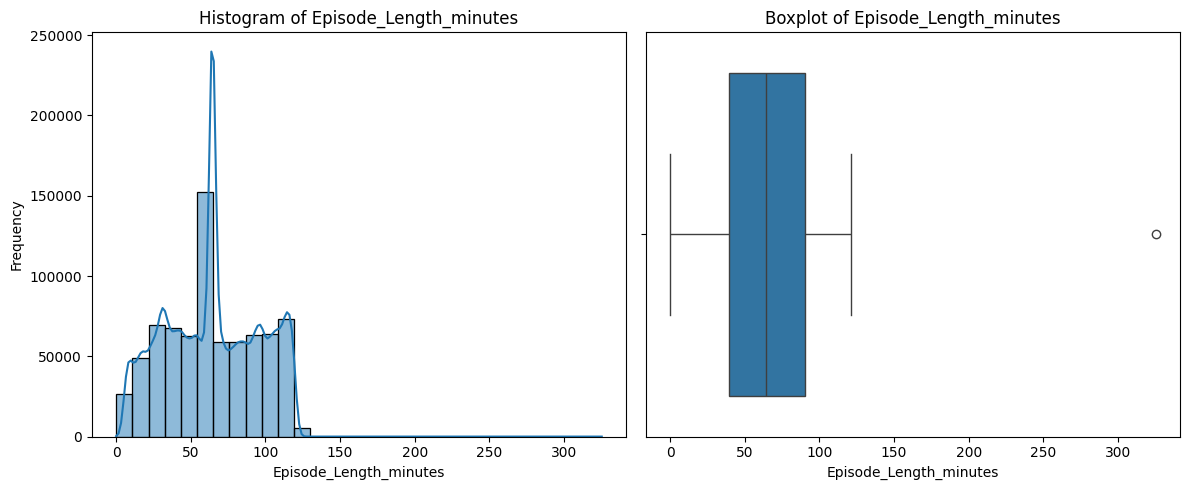


Statistics for Episode_Length_minutes:
Skewness: -0.00
Missing Values: 0


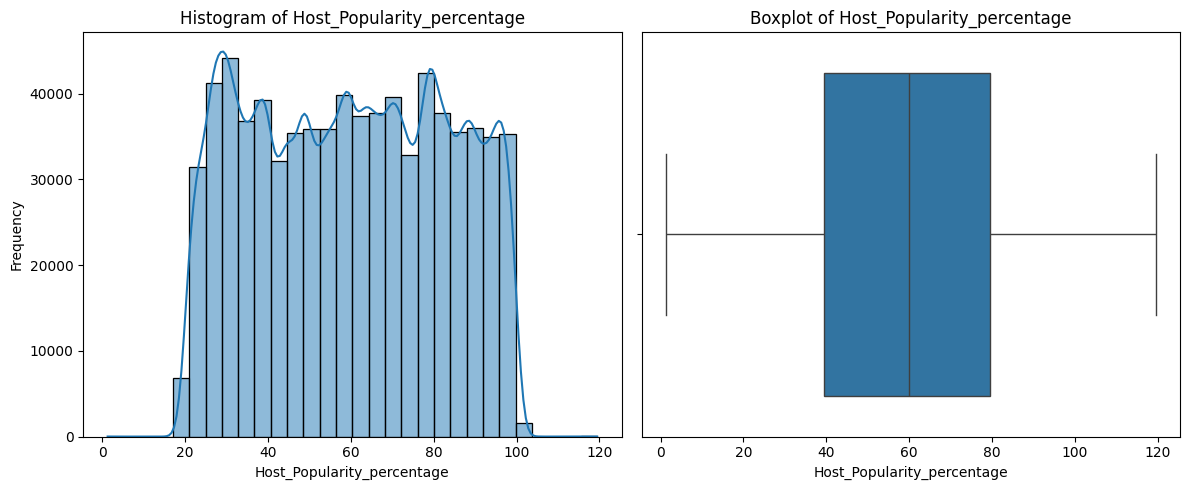


Statistics for Host_Popularity_percentage:
Skewness: 0.00
Missing Values: 0


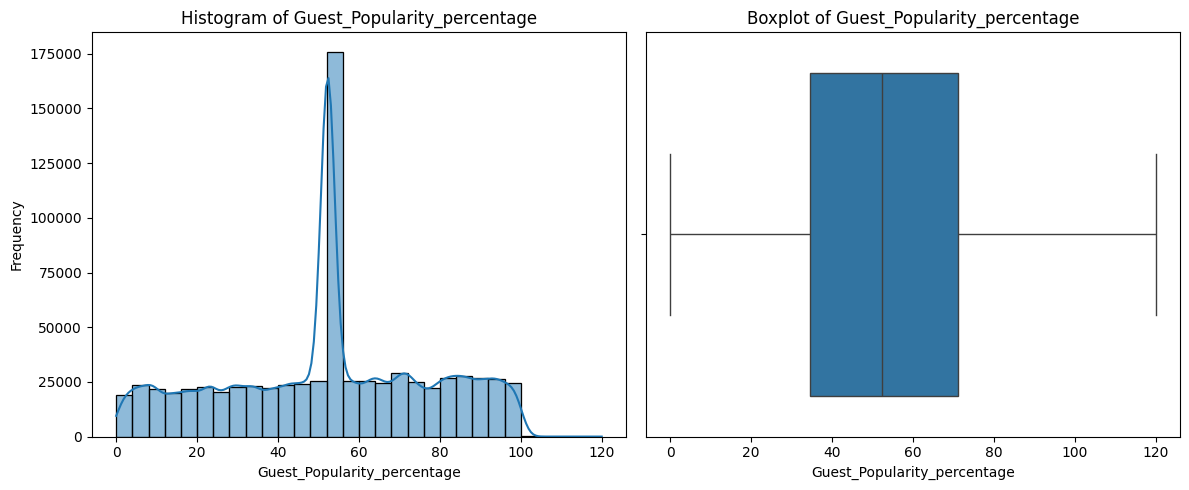


Statistics for Guest_Popularity_percentage:
Skewness: -0.12
Missing Values: 0


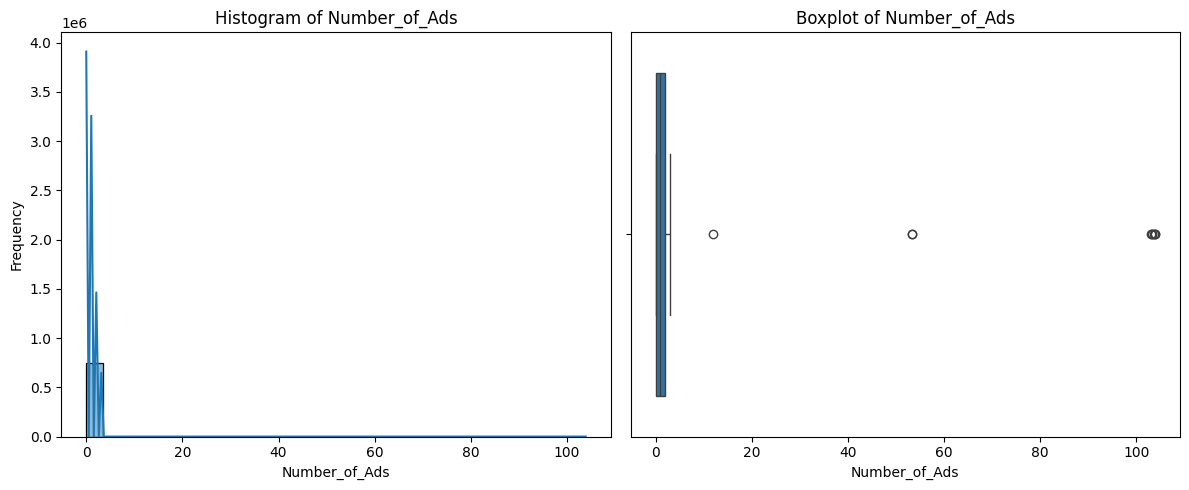


Statistics for Number_of_Ads:
Skewness: 6.03
Missing Values: 0


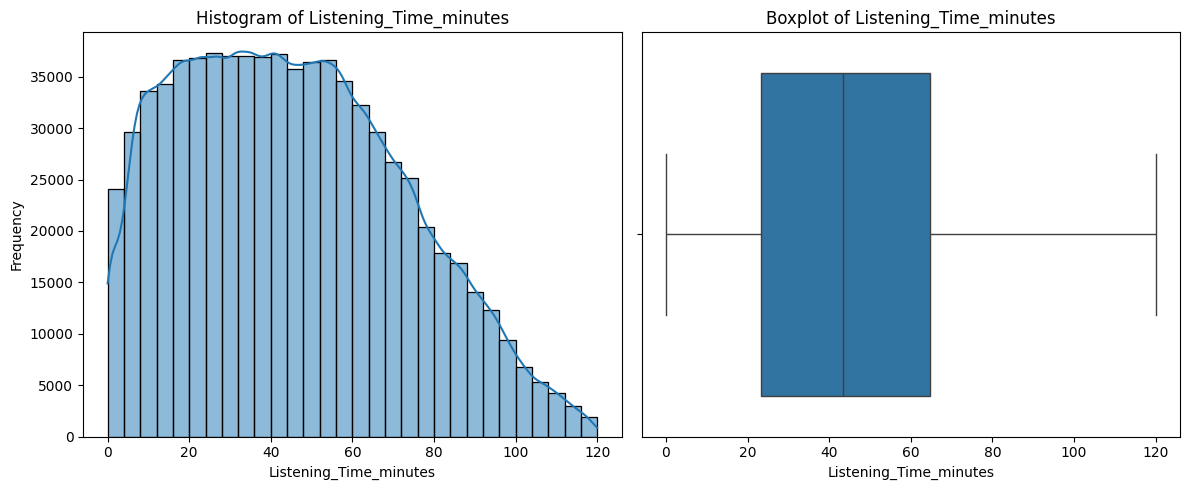


Statistics for Listening_Time_minutes:
Skewness: 0.35
Missing Values: 0


In [ ]:
# Analysing distributions of numerical features
numerical_features = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads',
    'Listening_Time_minutes',
]

numerical_distrib_analysis(df, numerical_features)

In [ ]:
def categorical_distrib_analysis(data, categorical_features, top_n=10):
    """
    Analyzes and visualizes the distribution of categorical features.

    :param data: Pandas DataFrame containing the dataset
    :param categorical_features: List of categorical column names
    :param top_n: Max number of top categories to display for high-cardinality features
    """
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))

        unique_count = data[feature].nunique()

        if unique_count > top_n:
            # Show only the top_n most frequent categories
            top_categories = data[feature].value_counts().nlargest(top_n)
            sns.barplot(x=top_categories.index, y=top_categories.values, palette="pastel")
            plt.title(f"Top {top_n} Categories of {feature}")
        else:
            # Show all categories
            sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")
            plt.title(f"Distribution of {feature}")
            plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

        # Print stats
        print(f"Feature: {feature}")
        print(f"Number of Unique Values: {unique_count}")
        print(f"Missing Values: {data[feature].isnull().sum()}\n")

/tmp/ipython-input-2250090980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="pastel")


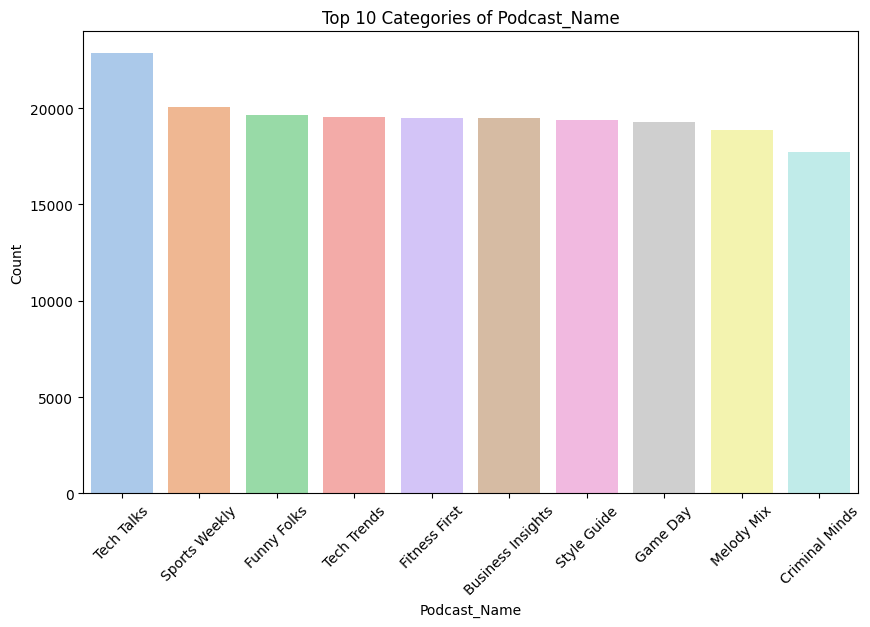

Feature: Podcast_Name
Number of Unique Values: 48
Missing Values: 0



/tmp/ipython-input-2250090980.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")


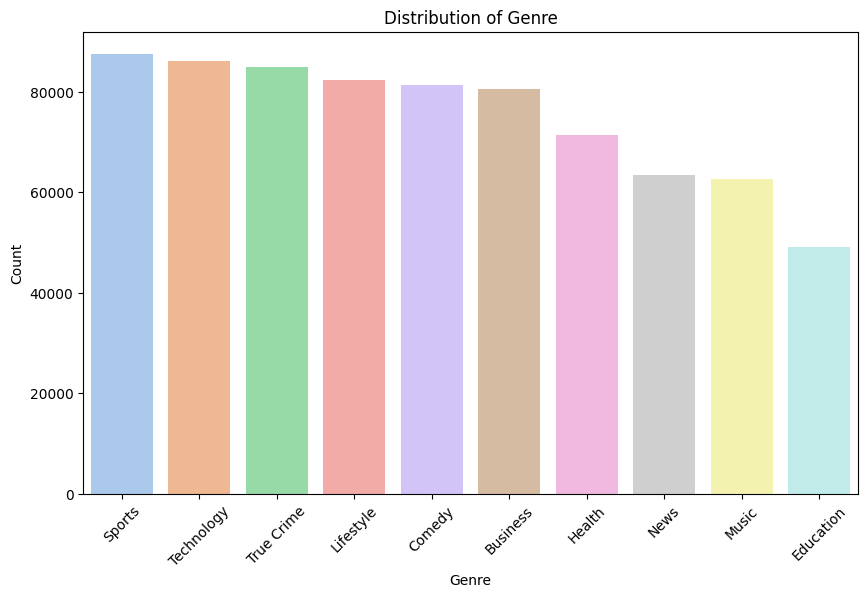

Feature: Genre
Number of Unique Values: 10
Missing Values: 0



/tmp/ipython-input-2250090980.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")


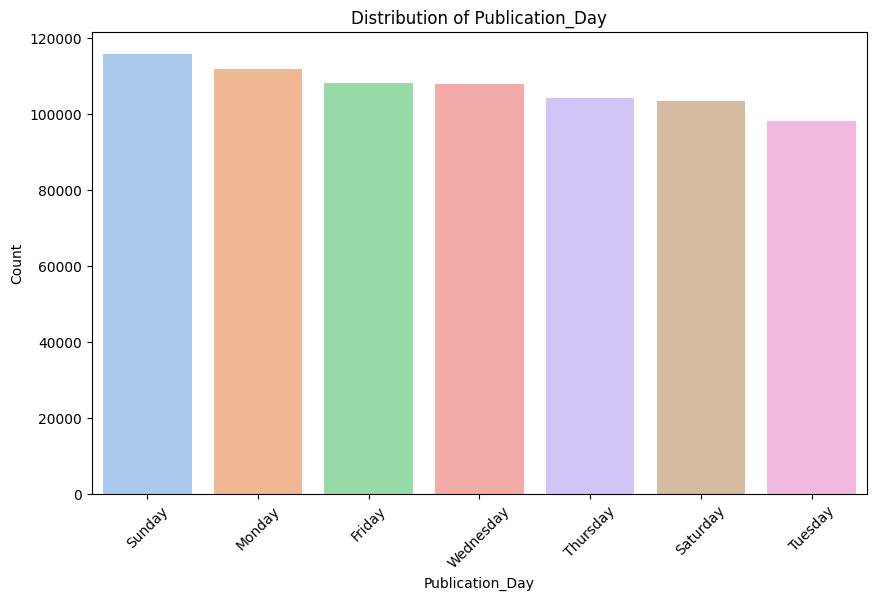

Feature: Publication_Day
Number of Unique Values: 7
Missing Values: 0



/tmp/ipython-input-2250090980.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")


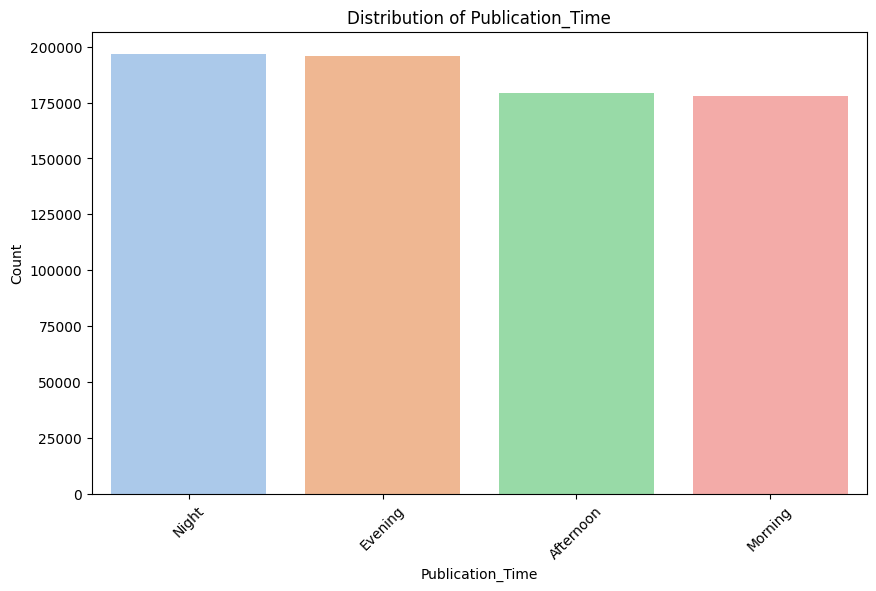

Feature: Publication_Time
Number of Unique Values: 4
Missing Values: 0



/tmp/ipython-input-2250090980.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")


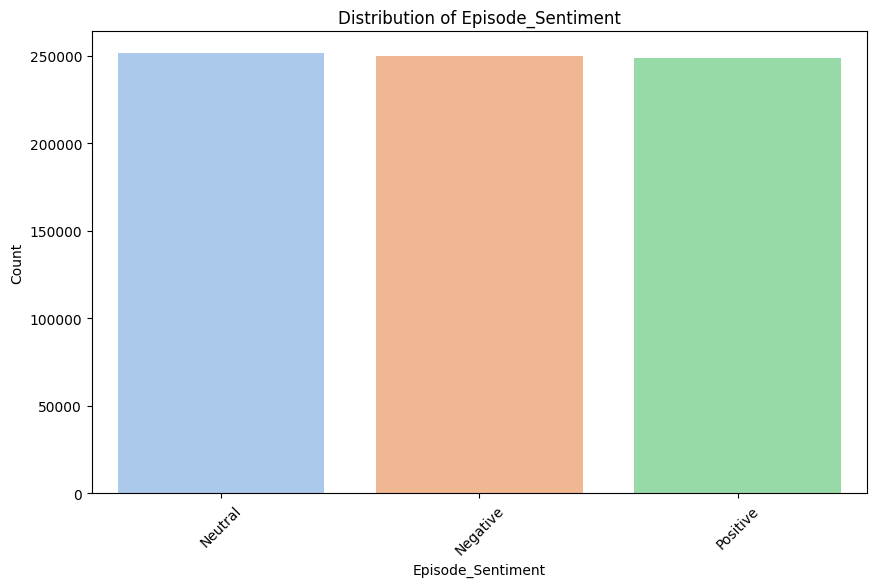

Feature: Episode_Sentiment
Number of Unique Values: 3
Missing Values: 0



In [ ]:
categorical_features = [
    'Podcast_Name',
    'Genre',
    'Publication_Day',
    'Publication_Time',
    'Episode_Sentiment'
]

categorical_distrib_analysis(df, categorical_features)

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df)
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")

if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")

In [ ]:
#Distribution of Listening_Time_minutes

#Correlation heatmap for numerical columns

#Bar plots for categorical features like Genre, Publication_Day, etc.

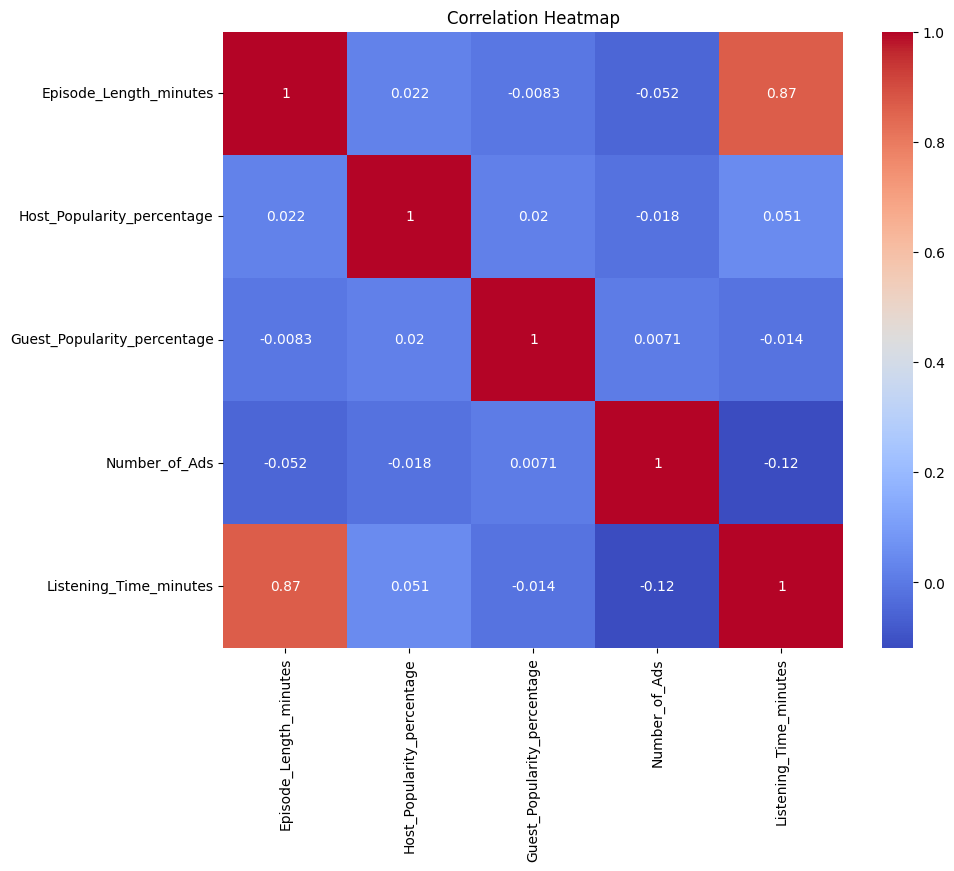

In [ ]:
#correlation heatmap
column=['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage','Number_of_Ads','Listening_Time_minutes']
corr_matrix = df[column].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#removing outliers from No_of_Ads
df=df[df['Number_of_Ads']<=10]

<Axes: xlabel='Number_of_Ads'>

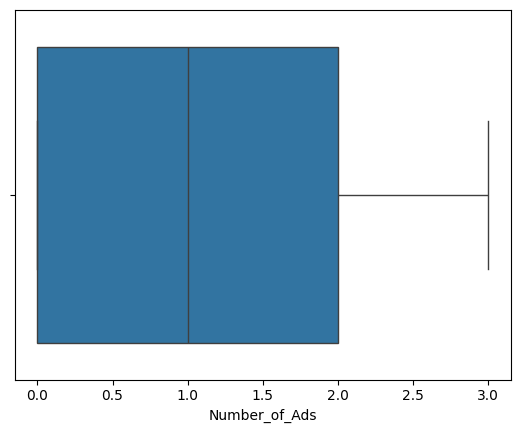

In [ ]:
sns.boxplot(x=df['Number_of_Ads'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749990 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           749990 non-null  int64  
 1   Podcast_Name                 749990 non-null  object 
 2   Episode_Title                749990 non-null  object 
 3   Episode_Length_minutes       749990 non-null  float64
 4   Genre                        749990 non-null  object 
 5   Host_Popularity_percentage   749990 non-null  float64
 6   Publication_Day              749990 non-null  object 
 7   Publication_Time             749990 non-null  object 
 8   Guest_Popularity_percentage  749990 non-null  float64
 9   Number_of_Ads                749990 non-null  float64
 10  Episode_Sentiment            749990 non-null  object 
 11  Listening_Time_minutes       749990 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 74.4+ MB


- Dumping Data Set into Mysql Server


In [ ]:
import os
from pyspark.sql import SparkSession

os.environ["JAVA_HOME"] = r"C:\Program Files\Java\jdk-17.0.2"
os.environ["PYSPARK_PYTHON"] = r"C:\Program Files\Python310\python3.exe"
os.environ["PYSPARK_DRIVER_PYTHON"] = r"C:\Program Files\Python310\python3.exe"

spark = SparkSession.builder \
    .appName("TestSpark") \
    .master("local[*]") \
    .getOrCreate()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("WriteToMySQL") \
    .master("local[*]") \
    .config("spark.jars", "file:///C:/spark/spark-4.0.0-bin-hadoop3/jars/mysql-connector-j-8.0.33.jar") \
    .config("spark.driver.extraClassPath", "file:///C:/spark/spark-4.0.0-bin-hadoop3/jars/mysql-connector-j-8.0.33.jar") \
    .getOrCreate()



In [ ]:
df_spark = spark.createDataFrame(df)

In [ ]:
url = "jdbc:mysql://localhost:3306/podcast"
properties = {
    "user": "root",
    "password": "root",
    "driver": "com.mysql.cj.jdbc.Driver"
}

df_spark.write.jdbc(url=url, table="podcast_data", mode="append", properties=properties)

print("Succesfully Dumped")

- Dropping unnecessary Columns

In [ ]:
df.drop(['id','Podcast_Name'],axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Title                750000 non-null  object 
 1   Episode_Length_minutes       750000 non-null  float64
 2   Genre                        750000 non-null  object 
 3   Host_Popularity_percentage   750000 non-null  float64
 4   Publication_Day              750000 non-null  object 
 5   Publication_Time             750000 non-null  object 
 6   Guest_Popularity_percentage  750000 non-null  float64
 7   Number_of_Ads                750000 non-null  float64
 8   Episode_Sentiment            750000 non-null  object 
 9   Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(5)
memory usage: 57.2+ MB


In [ ]:
X=df.drop('Listening_Time_minutes',axis=1)
y=df['Listening_Time_minutes']

- Converting Object Columns to Numerical Using OHE method

In [ ]:
X_ohe=pd.get_dummies(X)

In [ ]:
X_ohe.shape

(750000, 128)

- Splitting Data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ohe,y,test_size=0.2,random_state=42)

- Applying Standard Scalar to dataset

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit and transform training data
X_test_scaled = scaler.transform(X_test)        # transform test data (do NOT fit)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


- Model Building

In [ ]:
#linear regression
lr=LinearRegression()
# Use the transformed target
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import root_mean_squared_error,r2_score
rmse=root_mean_squared_error(y_test,y_pred)
print(rmse)
r2score=r2_score(y_test,y_pred)
print(r2score)




13.347190342340115
0.7578949824861352


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_train_scaled and X_test_scaled are your scaled features from the previous step
rfr = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=5, random_state=42)
rfr.fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

r2score = r2_score(y_test, y_pred)
print('R^2 Score:', r2score)


RMSE: 12.620998962801474
R^2 Score: 0.7835231078583427


In [ ]:
import pickle

# Save the fitted scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the fitted model
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(rfr, f)

# Save the list of expected feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X_ohe.columns.tolist(), f)


 model saved to random_forest1.pkl


/tmp/ipython-input-39-3544949906.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features_df, x='Importance', y='Feature', palette='viridis')


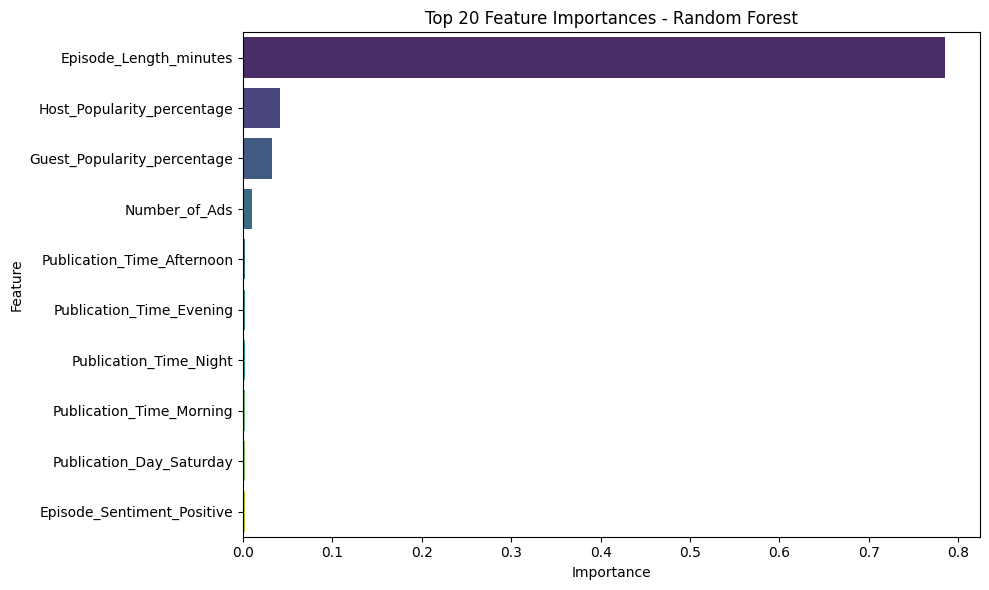

In [ ]:
# Extract feature importances
importances = rfr.feature_importances_
features = X_ohe.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 features
top_n = 10
top_features_df = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.1 MB/s eta 0:00:00


In [ ]:
#catboost
#!pip install catboost
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=500,verbose=2)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
rmse1=root_mean_squared_error(y_test,y_pred1)
print(rmse1)
r2score1=r2_score(y_test,y_pred1)
print(r2score1)

Learning rate set to 0.197635
0:	learn: 23.3241617	total: 264ms	remaining: 2m 11s
2:	learn: 18.3580934	total: 658ms	remaining: 1m 49s
4:	learn: 15.7448639	total: 1.04s	remaining: 1m 42s
6:	learn: 14.4456587	total: 1.33s	remaining: 1m 33s
8:	learn: 13.8058708	total: 1.51s	remaining: 1m 22s
10:	learn: 13.5154826	total: 1.69s	remaining: 1m 15s
12:	learn: 13.3799610	total: 1.87s	remaining: 1m 10s
14:	learn: 13.3158219	total: 2.07s	remaining: 1m 6s
16:	learn: 13.2789108	total: 2.25s	remaining: 1m 3s
18:	learn: 13.2604167	total: 2.43s	remaining: 1m 1s
20:	learn: 13.2488140	total: 2.6s	remaining: 59.4s
22:	learn: 13.2418061	total: 2.78s	remaining: 57.6s
24:	learn: 13.2352508	total: 2.94s	remaining: 55.9s
26:	learn: 13.2278756	total: 3.15s	remaining: 55.2s
28:	learn: 13.2234827	total: 3.33s	remaining: 54s
30:	learn: 13.2165213	total: 3.51s	remaining: 53.1s
32:	learn: 13.2135581	total: 3.67s	remaining: 52s
34:	learn: 13.2081252	total: 3.85s	remaining: 51.1s
36:	learn: 13.2053552	total: 4s	remai

In [ ]:
#XGBOOST
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
xgb_r = xgb.XGBRegressor()
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
r2score=r2_score(y_test,y_pred)
print(r2score)

RMSE: 13.005532
0.7703367493768121


In [ ]:
#lightgbm
import lightgbm as lgb
model = lgb.LGBMRegressor(
        n_iter=1000,
        max_depth=-1,
        num_leaves=1024,
        colsample_bytree=0.7,
        learning_rate=0.03,
        objective='l2',
        metric='rmse',
        verbosity=-1,
        max_bin=1024,
    )

model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)], # Add evaluation set
        callbacks=[
        lgb.log_evaluation(100),
        lgb.early_stopping(stopping_rounds=100)
            ],
    )
rmse=model.best_score_['valid_0']['rmse']
print(rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.623866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 599999, number of used features: 128
[LightGBM] [Info] Start training from score 45.441775


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


13.046191809334246
0.7688984950428434


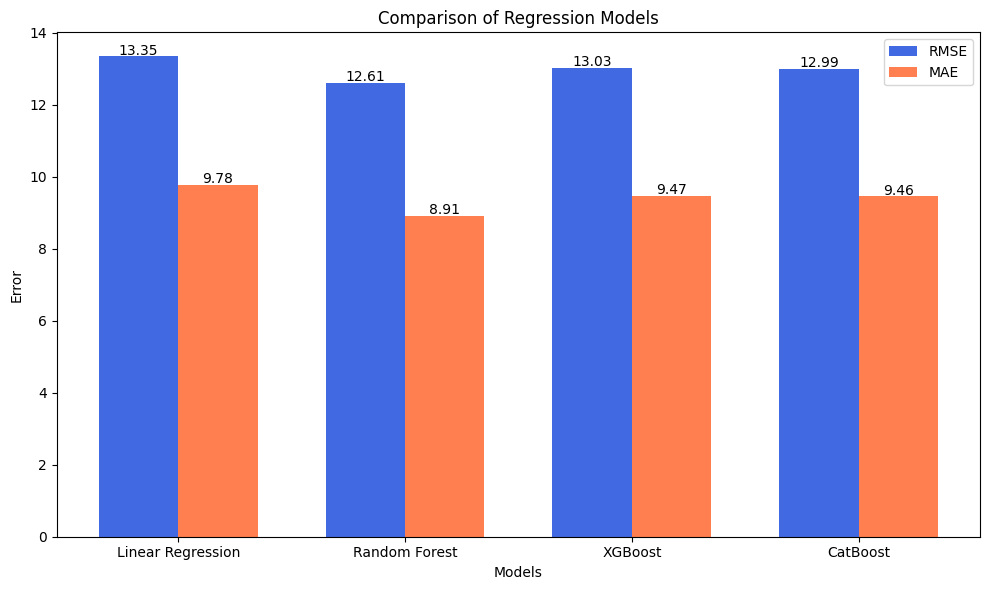

/tmp/ipython-input-1421579178.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_values, palette='viridis')


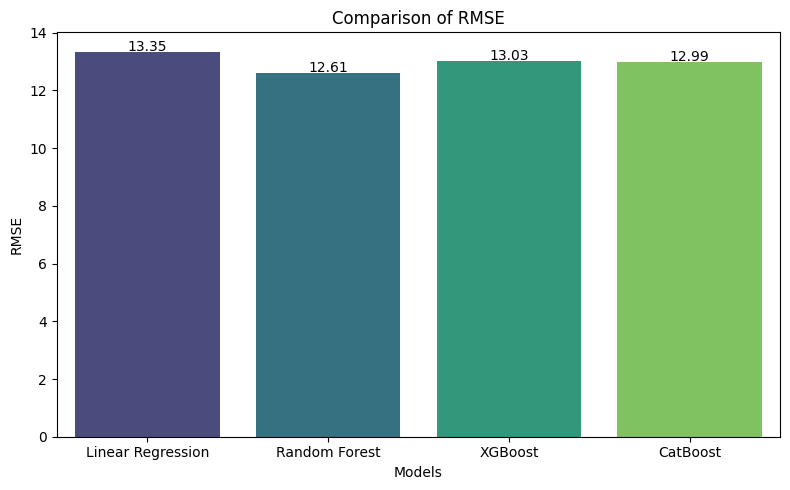

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(verbose=0, random_state=42))
]

rmse_values = []
mae_values = []
model_names = []

# Training, predicting, and storing metrics dynamically
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    rmse_values.append(rmse)
    mae_values.append(mae)
    model_names.append(name)

# Side-by-side bar plot for RMSE & MAE (like your left image)
bar_width = 0.35
x = np.arange(len(model_names))
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, rmse_values, bar_width, label='RMSE', color='royalblue')
plt.bar(x + bar_width/2, mae_values, bar_width, label='MAE', color='coral')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of Regression Models')
plt.xticks(x, model_names)
plt.legend()
for i, v in enumerate(rmse_values):
    plt.text(i - bar_width/2, v + 0.05, f"{v:.2f}", ha='center')
for i, v in enumerate(mae_values):
    plt.text(i + bar_width/2, v + 0.05, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Single-metric bar plot for RMSE (like your right image)
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=rmse_values, palette='viridis')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.03, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model=Sequential()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Define custom RMSE metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PODCAST_PREDICITION/Podcast_predicition_test.csv")  # Replace with your actual file path

# Check for NaNs in dataset
print("NaNs before handling:")
print(df.isnull().sum())

# Fill missing values in 'Episode_Length_minutes' and 'Guest_Popularity_percentage'
df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].mean(), inplace=True)
df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mean(), inplace=True)
df.dropna(subset=['Number_of_Ads'],inplace=True)
# Define features and target
X = df.drop(['Listening_Time_minutes', 'Episode_Title', 'id', 'Podcast_Name'], axis=1) # Dropping unnecessary columns
y = df['Listening_Time_minutes']

# Convert numerical columns to float32
for col in ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']:
    X[col] = X[col].astype('float32')
y = y.astype('float32')

# Check for NaNs after handling
print("\nNaNs after handling:")
print(X.isnull().sum())
print(np.any(X.isnull()))



# Define categorical and numerical columns
categorical_cols = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
numerical_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Build model with a lower learning rate
model = Sequential([
    Dense(128, input_dim=X_train_processed.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model with custom RMSE
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mean_squared_error',
              metrics=[rmse])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model with RMSE metric
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

NaNs before handling:
id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

NaNs after handling:


/tmp/ipython-input-36-3298173495.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].mean(), inplace=True)
/tmp/ipython-input-36-3298173495.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64
False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 314s 5ms/step - loss: 307.3331 - rmse: 15.2836 - val_loss: 181.2049 - val_rmse: 12.7318
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 311s 5ms/step - loss: 193.0899 - rmse: 13.1499 - val_loss: 177.4142 - val_rmse: 12.5921
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 326s 5ms/step - loss: 191.3998 - rmse: 13.0827 - val_loss: 178.4314 - val_rmse: 12.6288
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 296s 5ms/step - loss: 187.4398 - rmse: 12.9335 - val_loss: 192.6669 - val_rmse: 13.1283
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 325s 5ms/step - loss: 185.2591 - rmse: 12.8702 - val_loss: 212.4896 - val_rmse: 13.7956


In [ ]:
from sklearn.metrics import root_mean_squared_error
y_pred=model.predict(X_test_processed)
rmse=root_mean_squared_error(y_test,y_pred)
print(rmse)
r2score=r2_score(y_test,y_pred)
print(r2score)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
13.27748966217041
0.7606313824653625
